<a href="https://colab.research.google.com/github/Jahnavi149/Google-Stock-Price-Prediction/blob/main/Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [66]:
dataset = pd.read_csv('GOOGL.csv')
split_index = int(0.8 * len(dataset))
train_dataset = dataset.iloc[:split_index]
test_dataset = dataset.iloc[split_index:]
training_set = train_dataset.iloc[:, 1:2].values

In [67]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [68]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [69]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [70]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [72]:
regressor = Sequential()

In [73]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [74]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [75]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [76]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [77]:
regressor.add(Dense(units = 1))

In [78]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [79]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 123ms/step - loss: 0.0022
Epoch 2/100
38/38 [==============================] - 6s 154ms/step - loss: 4.1858e-04
Epoch 3/100
38/38 [==============================] - 5s 124ms/step - loss: 3.6507e-04
Epoch 4/100
38/38 [==============================] - 5s 133ms/step - loss: 3.2918e-04
Epoch 5/100
38/38 [==============================] - 5s 138ms/step - loss: 2.9987e-04
Epoch 6/100
38/38 [==============================] - 5s 122ms/step - loss: 3.0017e-04
Epoch 7/100
38/38 [==============================] - 6s 152ms/step - loss: 2.9542e-04
Epoch 8/100
38/38 [==============================] - 5s 122ms/step - loss: 2.8764e-04
Epoch 9/100
38/38 [==============================] - 5s 129ms/step - loss: 2.2964e-04
Epoch 10/100
38/38 [==============================] - 6s 159ms/step - loss: 2.5081e-04
Epoch 11/100
38/38 [==============================] - 5s 120ms/step - loss: 2.1883e-04
Epoch 12/100
38/38 [==============================] - 6

In [80]:
real_stock_price = test_dataset.iloc[:, 1:2].values

In [92]:
dataset_total = pd.concat((train_dataset['Open'], test_dataset['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_dataset) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 947):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

28/28 [==============================] - 1s 36ms/step


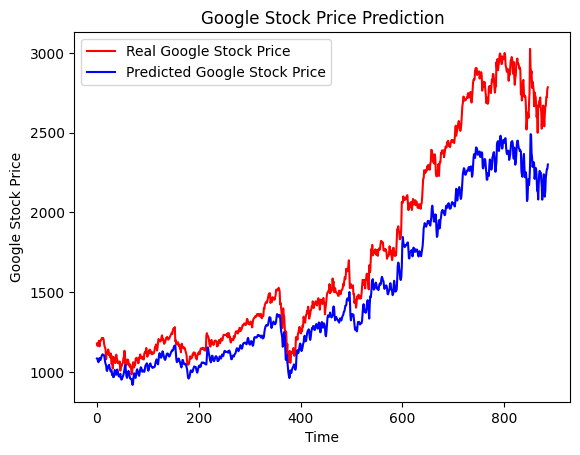

In [95]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f'Root Mean Squared Error (RMSE): {rmse}')
print('Mean target value: 2000')
rmse_avrg = rmse/2000
print(f'RMSE value with respect to target value = {rmse_avrg}')

Root Mean Squared Error (RMSE): 275.05720681261715
Mean target value: 2000
RMSE value with respect to target value = 0.13752860340630857
